# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [184]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "data/train.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [185]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = len(X_train[0]), len(X_train[0][0]) # train["sizes"][0]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = max(y_train + 1)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

In [186]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation


Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)


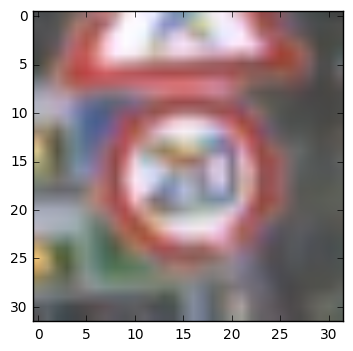

In [187]:
import tensorflow as tf
import numpy as np
import cv2
from sklearn.utils import shuffle
### Preprocess the data here.
### Feel free to use as many code cells as needed.
plt.imshow(X_train[0])
print(X_train[0].shape)
max_value = 0

def preprocess(one_image):
    global max_value
    r = one_image
    # starting 32x32x3
    # grey out
    #r = cv2.cvtColor(one_image, cv2.COLOR_BGR2GRAY)
    
    # normalize
    r = np.array(r) / 255
    # add dimention
    # r = np.expand_dims(r, axis=3)
    return r


myX_train = [None] * n_train
for i in range(n_train):
    myX_train[i] = preprocess(X_train[i])

myX_train, y_train = shuffle(myX_train, y_train)


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** 
1. Gray it out. ( but finaly I removed it )
2. normalize
3. shuffle

In [188]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.
from sklearn.model_selection import train_test_split
myX_train, myX_vali, y_train, y_vali = train_test_split(
  myX_train, y_train, test_size=0.2, random_state=123)
print (len(myX_train), len(myX_vali))
print(myX_train[0].shape)

31367 7842
(32, 32, 3)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**
20% validation set.

In [197]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
W_MU = 0
W_SIGMA = 0.1
LAYER_FILTER=[32, 64, 128, 192]

def mynet(x):
    # 32x32 -> 32x32x32
    width = 32
    c = x
    p_filter = 3
    for e_filter in LAYER_FILTER:
        print (p_filter, e_filter)
        c = conv_act(c, [5,5, p_filter, e_filter])
        c = maxpool2d(c)
        p_filter = e_filter
        width /= 2
        
    # Now shape is  width * width * LAYER_FILER[-1]]
    size =  int(width * width * LAYER_FILTER[-1])
    print("size after cnn/pooling", size)
    fc = tf.reshape(c, [-1,size])
    fc = full(fc, [size, 512])
    fc = tf.nn.relu(fc)
    
    fc = full(fc, [512, 128])
    fc = tf.nn.relu(fc)
    
    out = full(fc, [128, n_classes])
    print("last 128")
    return out

def wb(w_shape):
    W = tf.Variable(tf.truncated_normal(w_shape, mean=W_MU, stddev=W_SIGMA))
    b = tf.Variable(tf.zeros(w_shape[-1]))
    return (W, b)

def full(x, w_shape):
    W, b = wb(w_shape)
    return tf.add(tf.matmul(x, W), b)

def conv_act(x, w_shape):
    return tf.nn.relu(conv2d(x, w_shape))

def conv2d(x, w_shape, strides=1):
    W, b = wb(w_shape)
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return x


def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')




### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**
The architecture is:
32x32x3 -> CNN -> 32x32x32 -> max pooling -> 16x16x32 -> CNN -> 16x16x64 -> max pooling -> 8x8x64 -> CNN -> 8x8x128 -> max pooling -> 4x4x128 -> CNN -> 4x4x192 -> max_pooling -> 2x2x192 -> fatten -> 768 -> full connect -> 512 -> full connect -> 128 -> full_connect -> 43

In [198]:
print(len(y_train), y_train[0])
print(len(myX_train))
tf.reset_default_graph()

LEARN_R = 0.001
EPOCH = 30
BATCH = 100
import time

x = tf.placeholder(tf.float32, [None, 32, 32, 3])
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

logits = mynet(x)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=LEARN_R).minimize(cost)
prediction = tf.argmax(logits, 1)
correct_prediction = tf.equal(prediction, tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
init = tf.initialize_all_variables()
saver = tf.train.Saver()


def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH):
        batch_x, batch_y = X_data[offset:offset+BATCH], y_data[offset:offset+BATCH]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

31367 2
31367
3 32
32 64
64 128
128 192
size after cnn/pooling 768
last 128


In [191]:
### Train your model here.
### Feel free to use as many code cells as needed.



# Launch the graph
with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(EPOCH):
        t = time.time()
        t_train = len(myX_train)
        total_batch = int(t_train/BATCH)
        # Loop over all batches
        for offset in range(0, t_train, BATCH):
            # print("NOW offset", offset, t_train)

            batch_x, batch_y = myX_train[offset:offset+BATCH], y_train[offset:offset+BATCH]
            # Run optimization op (backprop) and cost op (to get loss value)
            sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

        validation_accuracy = evaluate(myX_vali, y_vali)
        print("EPOCH {} ...".format(epoch+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print("sec: {:.0f}".format(time.time()-t))
        saver.save(sess, "./myModel_%s" % (epoch + 1))


    


EPOCH 1 ...
Validation Accuracy = 0.249
sec: 388
EPOCH 2 ...
Validation Accuracy = 0.351
sec: 388
EPOCH 3 ...
Validation Accuracy = 0.417
sec: 395
EPOCH 4 ...
Validation Accuracy = 0.481
sec: 368
EPOCH 5 ...
Validation Accuracy = 0.531
sec: 363
EPOCH 6 ...
Validation Accuracy = 0.568
sec: 395
EPOCH 7 ...
Validation Accuracy = 0.607
sec: 358
EPOCH 8 ...
Validation Accuracy = 0.647
sec: 358
EPOCH 9 ...
Validation Accuracy = 0.670
sec: 359
EPOCH 10 ...
Validation Accuracy = 0.693
sec: 358
EPOCH 11 ...
Validation Accuracy = 0.711
sec: 359
EPOCH 12 ...
Validation Accuracy = 0.742
sec: 361
EPOCH 13 ...
Validation Accuracy = 0.761
sec: 357
EPOCH 14 ...
Validation Accuracy = 0.782
sec: 405
EPOCH 15 ...
Validation Accuracy = 0.798
sec: 358
EPOCH 16 ...
Validation Accuracy = 0.814
sec: 367
EPOCH 17 ...
Validation Accuracy = 0.824
sec: 388
EPOCH 18 ...
Validation Accuracy = 0.837
sec: 409
EPOCH 19 ...
Validation Accuracy = 0.844
sec: 393
EPOCH 20 ...
Validation Accuracy = 0.850
sec: 378
EPOCH 21 

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

Using gradient decent optimizer( should try adam optimazer). The batch size is 100 to fit everything into memory. Epoch is 30~40. If more the accuracy starts to going up and down. I used 4 levels of conv net and 3 levels full connect graph combined with LeNet and AlexNet.


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**
I think this problem is more complated than letter recognization so I used more features by increasing filter count
1. I tried 32, 64, 128 as conv net filter and two full connect layers from 2048 to 512 to n_classes(42). Starting ephco 30 the accuracy is around 0.8 and increasing slowly. So I stopped there.
2. Then I tried add one more layer of CNN
3. Originally I used gray picture but I changed it back to rgb 3 colors. And the result seems better.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

(32, 32, 3)


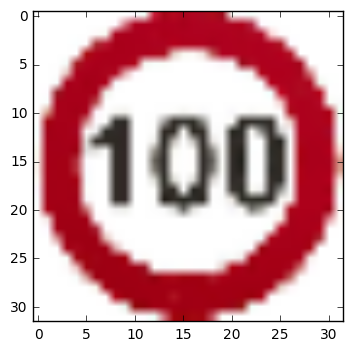

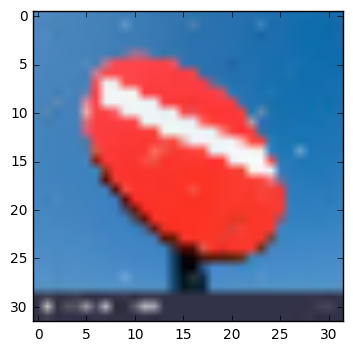

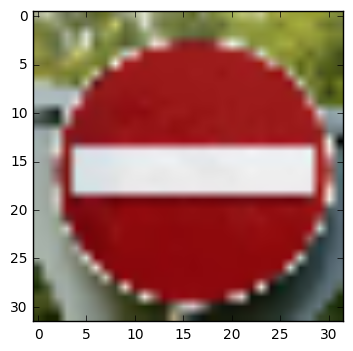

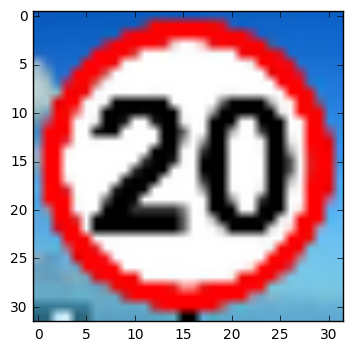

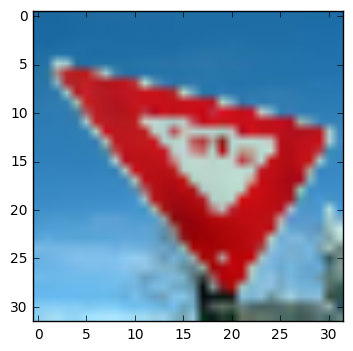

In [192]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

files = ["t/t1.jpeg", "t/t2.jpeg", "t/t3.jpeg", "t/t4.jpeg", "t/t5.jpeg"]
manual_y = [
    7, # speed limit 100
    17, # no entry
    17, # no entry
    0, # speed limit 20
    13  # yeld
]

manual_x = []
for each in files:
    plt.figure()
    image = mpimg.imread(each)
    image = cv2.resize(image, (32, 32))
    plt.imshow(image)
    manual_x.append(preprocess(image))

print(manual_x[4].shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**
The quality of picture doesn't quite matter because we need to resize them to 32x32 anyway.

In [193]:
# test set
myX_test = []
for each in X_test:
    myX_test.append(preprocess(each))
print(len(myX_test))

12630


In [194]:


with tf.Session() as sess:
    saver.restore(sess, "./myModel_30") 
    validation_accuracy = evaluate(myX_test, y_test)
    print("Validation Accuracy = {:.3f}".format(validation_accuracy))

Validation Accuracy = 0.749


In [195]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

print(len(manual_x))
# run compute correctness
def eval_my_collection(X_data, y_data):
    with tf.Session() as sess:
        saver.restore(sess, "./myModel_30")
        predicts = sess.run(prediction, feed_dict={x: X_data, y: y_data})
        correctness = sess.run(correct_prediction, feed_dict={x: X_data, y: y_data})
        print(predicts)
        print(correctness)
eval_my_collection(manual_x, manual_y)
#eval_my_collection(myX_vali[:10], y_vali[:10])

#w
#print(myX_vali[0], y_vali[0])

5
[21 10 17 29 17]
[False False  True False False]


### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**
No. The model only predict as 20% accuracy on the captured pictures.

In [196]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
top_k = tf.nn.top_k(logits, k=5)
with tf.Session() as sess:
        saver.restore(sess, "./myModel_30")
        predict_k = sess.run(top_k, feed_dict={x: manual_x, y: manual_y})
        print(predict_k)

TopKV2(values=array([[ 27.48212051,  23.31693649,  21.53375244,  15.67160892,
         15.64360046],
       [ 40.28850937,  36.66337204,  35.73040009,  25.24307632,
         14.36893368],
       [ 47.76858521,  26.55970192,  18.3158989 ,  17.89130592,
         16.98703957],
       [ 24.39676857,  23.82776642,  17.29518127,  17.14699554,
         15.74245834],
       [ 40.40645599,  24.70362473,  21.50830269,  18.3920002 ,
         18.15302086]], dtype=float32), indices=array([[21, 11, 24, 27, 41],
       [10, 17, 14, 12, 11],
       [17, 22, 25, 14,  8],
       [29, 21, 20, 18, 23],
       [17, 13, 20, 25, 14]], dtype=int32))


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**
1. The correct prediction (3rd pic) it is fairly certain it is no entry sign as the 2nd value much less that the top 1st in the softmax(26. vs 47.)
2. The 2nd and 5th picture got correct prediction on the 2nd value.
3. The 1st and 4th picture has no correct prediction in the top 5 value. I would guess maybe those kind of speed limit sign has less training pictures in the training set.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.